# Latent Factor Model

In [1]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

/home/sehyeon/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 데이터 불러오기
train: 학습할 데이터
test: 검사할 데이터

In [2]:
train = pd.read_csv("ml-100k/ua.base", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
train

,user,movie,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712
...,...,...,...,...
90565,943,1047,2,875502146
90566,943,1074,4,888640250
90567,943,1188,3,888640250
90568,943,1228,3,888640275


In [3]:
test = pd.read_csv("ml-100k/ua.test", sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test

,user,movie,rating,timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201
...,...,...,...,...
9425,943,232,4,888639867
9426,943,356,4,888639598
9427,943,570,1,888640125
9428,943,808,4,888639868


In [4]:
items_train = torch.LongTensor(train['movie'])
users_train = torch.LongTensor(train['user'])
ratings_train = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])
print(ratings_train)
print(ratings_test)

tensor([5., 3., 4.,  ..., 3., 3., 3.])
tensor([4., 4., 4.,  ..., 1., 4., 2.])


## 차원 설정, Item, User Matrix 생성
P = 아이템 matrix(1682×10)
Q = 사용자 matrix(943×10)

In [9]:
rank = 10 # 차원 설정
numItems = items_train.max() + 1
numUsers = users_train.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

## Training, Test
Regularization: lambda, loss 추가

epoch: 0, cost:23.684534
epoch: 100, cost:0.690924
epoch: 200, cost:0.639532
epoch: 300, cost:0.630299
epoch: 400, cost:0.628139
epoch: 500, cost:0.627510
epoch: 600, cost:0.627220
epoch: 700, cost:0.627040
epoch: 800, cost:0.626896
epoch: 900, cost:0.626768


<function matplotlib.pyplot.show(close=None, block=None)>

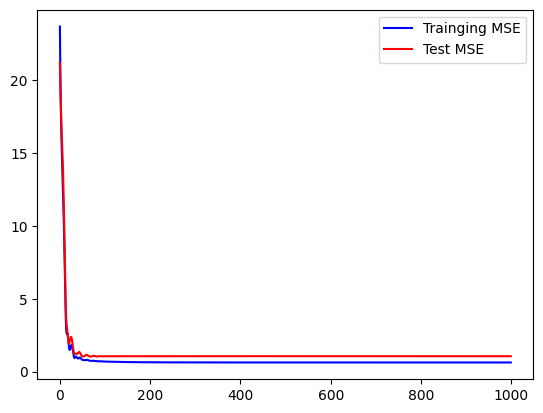

In [10]:
optimizer = torch.optim.Adam([P, Q], lr=0.1)

lambda1 = 0.0001
lambda2 = 0.0001
lambda3 = 0.0001
lambda4 = 0.0001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings_train.sum() / len(ratings_train)).item()

X=[]
Y=[]
Y_test=[]

for epoch in range(1000):
    hypothesis = torch.sum(P[items_train] * Q[users_train], dim=1)
    cost = F.mse_loss(hypothesis, ratings_train)
    loss = cost.item() + lambda1 * torch.sum(P**2) + lambda2 * torch.sum(Q**2)

    optimizer.zero_grad()
    loss.backward()
    cost.backward()
    optimizer.step()

    X.append(epoch)
    Y.append(cost.item())

    with torch.no_grad():
        hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
        cost_test = F.mse_loss(hypo_test, ratings_test)
        Y_test.append(cost_test.item())

    if epoch % 100 == 0:
        print("epoch: {}, cost:{:.6f}".format(epoch, cost.item()))

plt.ylabel=("MSE")
plt.xlabel=("Cpoch")
plt.plot(X, Y, c="blue", label="Trainging MSE")
plt.plot(X, Y_test, c="red", label="Test MSE")
plt.legend()
plt.show